## Summary results

In [108]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [248]:
def get_dataframe(target, target_folder, features, epsilon):
    # 1. Get subidrectories
    subdirs = [os.path.join('.', folder, target) for folder in target_folder]
    # 2. Load dataframes
    dataframes = [pd.read_csv(path, index_col=[0]) for path in subdirs]
    # 3. Slice them
    dataframes = [df.loc[df.Epsilon == epsilon, features] for df in dataframes]
    # 4. Retunr concat
    return pd.concat(dataframes)

def create_table(df):
    best_result = []
    for optim in df.Optim.unique():
        crnt_df = df[(df.Optim == optim)]
        best = crnt_df[crnt_df.SuccesRate == crnt_df.SuccesRate.max()].iloc[0, :]
        best_result.append(best)
    return pd.DataFrame(best_result, columns = df.columns)

def plot_by_gradient(df, ax, title = 0):
    for optim in df.Optim.unique():
        ax.plot(df.loc[df.Optim == optim, 'NGradient'], df.loc[df.Optim == optim, 'SuccesRate'], label = optim.capitalize())
    
    if title == 0:
        attack_type = ' untarget ' if df.loc[0, 'Target'] == 0 else ' target '
        data = str(df.Data[0]).upper()
        ax.set_title(data + attack_type + 'attack with $L_{\infty} < $'+str(epsilon))
    else:
        ax.set_title(title)
    ax.set_xlabel('Function evaluation per step')
    ax.set_ylabel('Succes rate')
    ax.legend()
    ax.grid()    
    return ax

def plot_by_time(df, ax, title = 0):
    for optim in df.Optim.unique():
        ax.plot(df.loc[df.Optim == optim, 'MeanTime'], df.loc[df.Optim == optim, 'SuccesRate'], label = optim.capitalize())
    
    if title == 0:
        attack_type = ' untarget ' if df.loc[0, 'Target'] == 0 else ' target '
        data = str(df.Data[0]).upper()
        ax.set_title(data + attack_type + 'attack with $L_{\infty} < $'+str(epsilon))
    else:
        ax.set_title(title)
    
    ax.set_xlabel('Mean time per attack (s)')
    ax.set_ylabel('Succes rate')
    ax.legend()
    ax.grid()    
    return ax


def scatter_by_time(df, ax):
    for n, values in df.iterrows():
        l = '{}.{}'.format(values[0], values[-1]) if type(values[-1]) == str else values[0]
        ax.scatter(values[-3], values[3], label = l)

    ax.set_title('Succes Rate by time')
    ax.set_xlabel('Time per attack')
    ax.set_ylabel('Succes Rate')
    ax.set_ylim([0.75, 1])
    ax.legend(loc='lower right')
    ax.grid()
    
    
def scatter_by_epsilon(df, ax):
    for n, values in df.iterrows():
        l = '{}.{}'.format(values[0], values[-1]) if type(values[-1]) == str else values[0]
        ax.scatter(values[-2], values[3], label = l)

    ax.set_title('Succes Rate and mean epsilon')
    ax.set_xlabel('Mean Epsilon')
    ax.set_ylabel('Succes Rate')
    ax.set_ylim([0.75, 1])
    ax.legend(loc='lower right')
    ax.grid()

### 1. MNIST

**1.a Infinity norm**

In [165]:
### UNTARGET
target = 'MUI.csv'
target_folder = ['InexactZSCG', 'ClassicZSCG']
features = ['Optim', 'Target', 'Data', 'Epsilon', 'SuccesRate', 'NGradient', 'MeanTime']
epsilon = 0.2

df = get_dataframe(target, target_folder, features, epsilon)
latex_table = create_table(df)
latex_table

,Optim,Target,Data,Epsilon,SuccesRate,NGradient,MeanTime
5,inexact,0,mnist,0.2,0.96,16000,1.255964
21,classic,0,mnist,0.2,0.97,4000,0.860286


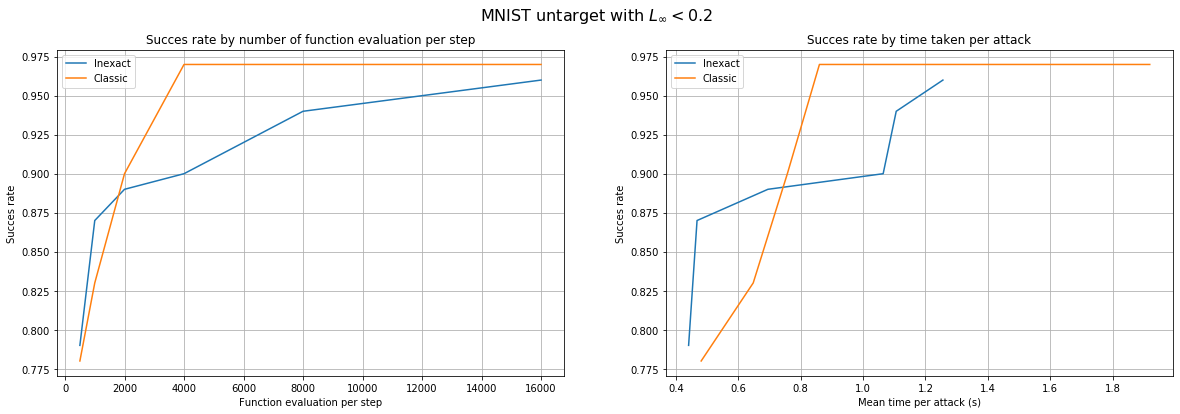

In [166]:
fig = plt.figure(figsize = (20, 6))
fig.suptitle('MNIST untarget with $L_{\infty} < 0.2$', fontsize=16)
ax = fig.add_subplot(1, 2, 1)
plot_by_gradient(df, ax, title='Succes rate by number of function evaluation per step')
ax = fig.add_subplot(1, 2, 2)
plot_by_time(df, ax, title='Succes rate by time taken per attack')
plt.show()

In [188]:
### UNTARGET
target = 'MTI.csv'
target_folder = ['InexactZSCG', 'ClassicZSCG']
features = ['Optim', 'Target', 'Data', 'Epsilon', 'SuccesRate', 'NGradient', 'MeanTime']
epsilon = 0.2

df = get_dataframe(target, target_folder, features, epsilon)
latex_table = create_table(df)
latex_table

,Optim,Target,Data,Epsilon,SuccesRate,NGradient,MeanTime
11,inexact,1,mnist,0.2,0.406667,16000,13.564833
9,classic,0,mnist,0.2,0.555556,8000,6.632288


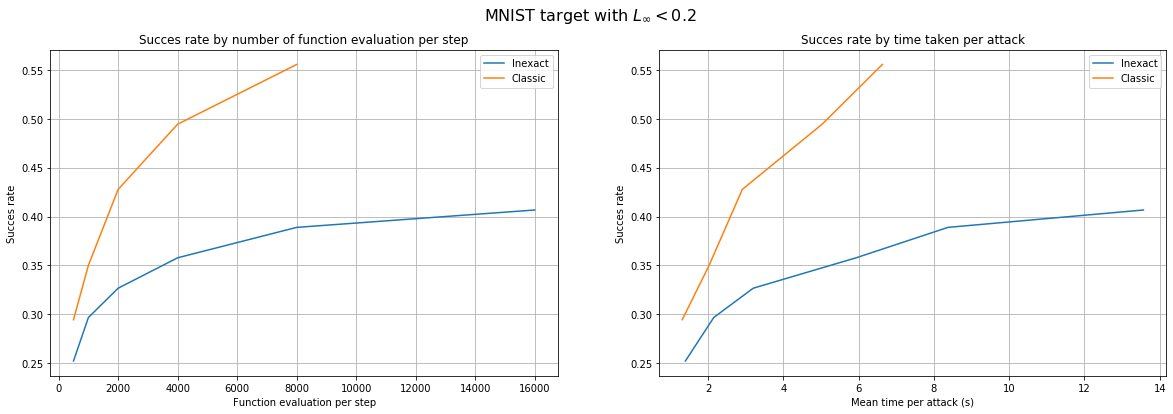

In [168]:
fig = plt.figure(figsize = (20, 6))
fig.suptitle('MNIST target with $L_{\infty} < 0.2$', fontsize=16)
ax = fig.add_subplot(1, 2, 1)
plot_by_gradient(df, ax, title='Succes rate by number of function evaluation per step')
ax = fig.add_subplot(1, 2, 2)
plot_by_time(df, ax, title='Succes rate by time taken per attack')
plt.show()

**1.b L2 norm**

In [175]:
### UNTARGET


,Optim,Target,Data,Epsilon,SuccesRate,NGradient,MeanTime
11,inexact,1,mnist,4.0,0.838889,16000,4.747049
7,classic,1,mnist,4.0,0.894444,32000,4.979423


In [217]:
### TARGET
target = 'MT2.csv'
target_folder = ['InexactZSCG', 'ClassicZSCG']
features = ['Optim', 'Target', 'Data', 'SuccesRate', 'NGradient', 'MeanTime', 'MeanEpsilon']
epsilon = 4

df = get_dataframe(target, target_folder, features, epsilon)
df = df.sort_values(by='NGradient').sort_values(by='Optim')

zoo = pd.read_csv('.//ZOO//ZOO_Results.csv')
zoo = zoo.loc[(zoo.Data == 'mnist') & (zoo.Target == 1)]
zoo.columns = zoo.columns[:-3].tolist() + ['NGradient'] + zoo.columns[-2:].tolist()

latex_table = create_table(df)
latex_table = pd.concat([latex_table, zoo]).iloc[:, :8]
latex_table

,Optim,Target,Data,SuccesRate,NGradient,MeanTime,MeanEpsilon,Solver
7,classic,1,mnist,0.894444,32000,4.979423,2.319200,NaN
11,inexact,1,mnist,0.838889,16000,4.747049,3.448653,NaN
3,zoo,1,mnist,0.980000,128,6.200449,2.421824,adam
7,zoo,1,mnist,0.977778,128,21.061184,2.137386,newton


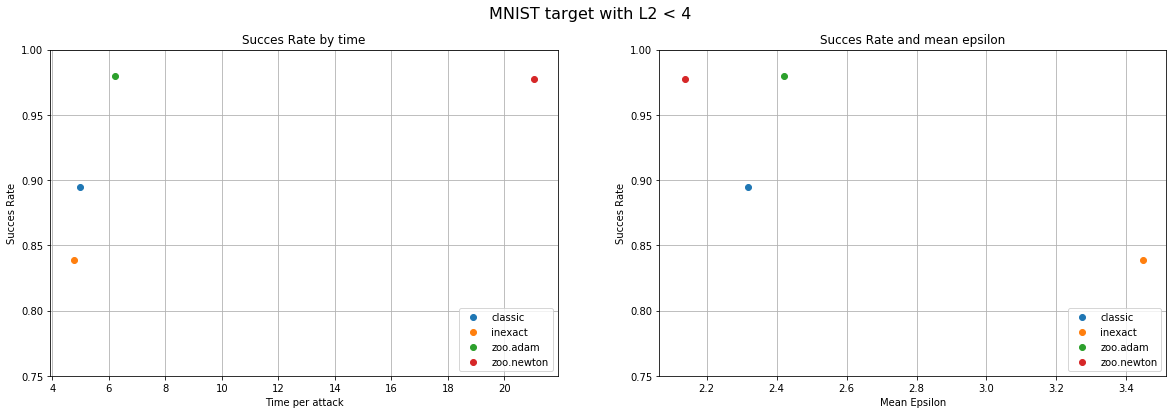

In [249]:
fig = plt.figure(figsize = (20, 6))
fig.suptitle('MNIST target with L2 < 4', fontsize=16)
ax = fig.add_subplot(1, 2, 1)
scatter_by_time(latex_table, ax)
ax = fig.add_subplot(1, 2, 2)
scatter_by_epsilon(latex_table, ax)

### 2. CIFAR10

**2.a Infinity norm**

In [163]:
### UNTARGET
target = 'CUI.csv'
target_folder = ['InexactZSCG', 'ClassicZSCG']
features = ['Optim', 'Target', 'Data', 'Epsilon', 'SuccesRate', 'NGradient', 'MeanTime']
epsilon = 0.01

df = get_dataframe(target, target_folder, features, epsilon)
latex_table = create_table(df)
latex_table

FileNotFoundError: [Errno 2] File .\InexactZSCG\CUI.csv does not exist: '.\\InexactZSCG\\CUI.csv'